In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

x = []
with open ('temp') as fp:
    for line in fp:
        fields = line.strip().split(',')
        if len(x) == 0:
            for n in fields:
                x.append([float(n)])
        else:
            for i,n in enumerate(fields):
                x[i].append(float(n))

bw_aware = [5.071, 24.7331, 27.2075, 460.5104, 253.3181, 140.4332, 417.3465, 44.4357, 40.4551, 62.7147, 765.2994, 45.0347, 428.7127]
gpu_local = [2.9621, 24.4544, 20.3793, 388.3735, 197.8303, 129.46, 410.0756, 40.0738, 32.7385, 58.7855, 743.9219, 31.7771, 341.1845]
y = [[xij/bi for xij in xi]for xi,bi in zip(x,bw_aware)]

xlabels = []
for i in range(0, 110, 10):
    s = '%dG-%dD' % (100-i, i) 
    xlabels.append(s)
print xlabels
labels = ['xsbench', 'comd', 'minife', 'kmeans', 'srad_v1', 'gaussian', 'btree', 'sc_gpu', 'mummergpu', 'needle', 'pathfinder', 'bfs', 'backprop']
markers = ['g--', 'g-', '+-', 'x-', '*-', '^-', 'o-', 'd-', 's-', 'v--', '+--', 'x--', '*--', '^--', 'o--', 'd--', 's--', 'v--']
plt.figure(figsize=(15,6))
for yi,mi in zip(y,markers):
    plt.plot(yi, mi)
plt.xticks(range(11))
plt.gca().set_xticklabels(xlabels, rotation=45, size=12)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(labels, ncol=8)
plt.xlabel('Placement Ratio', size=14)
plt.ylabel('Non-Caching Throughput \nRelative to Cached-BW-AWARE', size=14)
plt.savefig('placement-baseline.pdf')

y = [xi[3]/bi for xi,bi in zip(x, bw_aware)]
z = [max(xi)/bi for xi,bi in zip(x,bw_aware)]
xlabels = ['xsbench', 'comd', 'minife', 'kmeans', 'srad_v1', 'gaussian', 'btree', 'sc_gpu', 'mummergpu', 'needle', 'pathfinder', 'bfs', 'backprop']
z_dict = {}
for n,y in zip(z,xlabels):
    z_dict[y] = n
print z_dict    
bw_uncache = [xi[3]/bi for xi,bi in zip(x, gpu_local)]
best_uncache = [max(xi)/bi for xi,bi in zip(x,gpu_local)]
bw_aware_rel = [xi/gi for xi,gi in zip(bw_aware,gpu_local)]
best_ratio = [np.argmax(xi) for xi in x]
best_ratio_label = ['%dG-%dD' % (100-n*10, n*10) for n in best_ratio]

bw_uncache.append(scipy.stats.gmean(bw_uncache))
best_uncache.append(scipy.stats.gmean(best_uncache))
bw_aware_rel.append(scipy.stats.gmean(bw_aware_rel))

labels = ['70G-30D_SysMemCached_NoMigration', '70G-30D_NoSysmemCached_NoMigration', 'BestPlacement_NoSysMemCached_NoMigration']
xlabels = ['xsbench', 'comd', 'minife', 'kmeans', 'srad_v1', 'gaussian', 'btree', 'sc_gpu', 'mummergpu', 'needle', 'pathfinder', 'bfs', 'backprop', 'geomean']
plt.figure(figsize=(16,7))
width = 0.4
ind = np.arange(len(bw_aware) + 1)
for i,xi,bi,yi,zi in zip(ind,xlabels,bw_aware_rel,bw_uncache,best_uncache):
    plt.bar(i, bi, width/2, label=xi, color='r')
    plt.bar(i+width/2, yi, width/2, color='b')
    plt.bar(i+2*width/2, zi, width/2, color='c')
plt.xticks(range(len(xlabels)))
plt.gca().set_xticklabels(xlabels, rotation=45, size=14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(labels)
plt.ylabel('Throughput Relative to \n 100G-0D_SysMemCached_NoMigration', size=14)

# put the text outside the z bars
for i,zi,label in zip(ind,best_uncache,best_ratio_label):
    plt.text(i+2*width/2+width/4, zi+0.02, label, ha='center', va='bottom', rotation=45)    
plt.plot([0, len(bw_aware)+1], [1,1], 'k-', lw='2')    
plt.grid(True)
    
plt.savefig('placement-bar.pdf')

mig_uncache = {}
with open ('migration-uncache') as fp:
    for line in fp:
        fields = line.strip().split(',')
        mig_uncache[fields[0]] = float(fields[1])
        
cpu_local_uncache = {}
with open ('cpu-local-uncache') as fp:
    for line in fp:
        fields = line.strip().split(',')
        cpu_local_uncache[fields[0]] = float(fields[1])
        
mig_cache = {'backprop':253.0170467, 'bfs':40.735116, 'mummergpu':24.63752023, 'needle':56.34492796, 'pathfinder':610.2260144,  'kmeans':410.67804, 'srad_v1':215.7857516, 'comd':24.0553021, 'minife':8.89191134, 'xsbench':3.442802143}
cpu_local = {'bfs':9.8394, 'backprop':177.3354, 'mummergpu':11.9979, 'pathfinder':463.8296, 'needle':35.7006, 'kmeans':153.812, 'srad_v1':100.0213, 'comd':16.3536, 'minife':9.1128, 'xsbench':0.9035}        

mig_uncache_rel = {mi:mig_uncache[mi]/cpu_local[mi] for mi in mig_uncache}
mig_cache_rel = {mi:mig_cache[mi]/cpu_local[mi] for mi in mig_cache}
cpu_local_uncache_rel = {mi:cpu_local_uncache[mi]/cpu_local[mi] for mi in cpu_local_uncache}

labels = ['0G-100D_SysMemCached_Migration', '0G-100D_NoSysMemCached_Migration', '0G-100D_NoSysMemCached_NoMigration']
xlabels = []

plt.figure(figsize=(16,7))
width = 0.4
ind = np.arange(len(mig_cache_rel))
for i,mi in zip(ind,mig_cache_rel.items()):
    plt.bar(i, mi[1], width/2, label=mi[0], color='r')
    plt.bar(i+width/2, mig_uncache_rel[mi[0]], width/2, color='b')
    plt.bar(i+2*width/2, cpu_local_uncache_rel[mi[0]], width/2, color='c')
    xlabels.append(mi[0])

geo_mig_cache_rel = scipy.stats.gmean(mig_cache_rel.values())
geo_mig_uncache_rel = scipy.stats.gmean(mig_uncache_rel.values()) 
geo_cpu_local_uncache_rel = scipy.stats.gmean(cpu_local_uncache_rel.values()) 

i = len(mig_cache_rel)
plt.bar(i, geo_mig_cache_rel, width/2, label='geomean', color='r')
plt.bar(i+width/2, geo_mig_uncache_rel, width/2, color='b')
xlabels.append('geomean')
    
plt.xticks(range(len(mig_cache_rel)+1))
plt.gca().set_xticklabels(xlabels, rotation=45, size=14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(labels)
plt.ylabel('Throughput Relative to \n 0G-0100D_SysMemCached_NoMigration', size=14)
plt.grid(True)

plt.plot([0, len(mig_cache_rel)+1], [1,1], 'k-', lw='2')    
    
plt.savefig('migration-bar.pdf')

labels = ['read-only']
xlabels = []

plt.figure(figsize=(16,7))
width = 0.4
ind = np.arange(len(write_per))
for i,mi in zip(ind,write_per.items()):
    plt.bar(i, mi[1], width/2, label=mi[0], color='c')
    xlabels.append(mi[0])

geo_write_per = scipy.stats.gmean(write_per.values()) 

i = len(write_per)
plt.bar(i, geo_write_per, width/2, label='geomean', color='c')
xlabels.append('geomean')
    
plt.xticks(range(len(write_per)+1))
plt.gca().set_xticklabels(xlabels, rotation=45, size=14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(labels)
plt.ylabel('Percentage of Read-Only Data \n(4kB page granularity)', size=14)
plt.grid(True)
    
plt.savefig('read-only.pdf')

readOnly_caching_bwaware = {}
with open ('placement-readOnly') as fp:
    for line in fp:
        fields = line.strip().split(',')
        readOnly_caching_bwaware[fields[0]] = []
        for i in range(len(fields) - 1):
            readOnly_caching_bwaware[fields[0]].append(float(fields[i+1]))

bw_aware = {'xsbench':5.071, 'comd':24.7331, 'minife':27.2075, 'kmeans':460.5104, 'srad_v1':253.3181, 'gaussian':140.4332, 'btree':417.3465, 'sc_gpu':44.4357, 'mummergpu':40.4551, 'needle':62.7147, 'pathfinder':765.2994, 'bfs':45.0347, 'backprop':428.7127}
gpu_local = {'xsbench':2.9621, 'comd':24.4544, 'minife':20.3793, 'kmeans':388.3735, 'srad_v1':197.8303, 'gaussian':129.46, 'btree':410.0756, 'sc_gpu':40.0738, 'mummergpu':32.7385, 'needle':58.7855, 'pathfinder':743.9219, 'bfs':31.7771, 'backprop':341.1845}

bw_aware_rel = {mi:bw_aware[mi]/gpu_local[mi] for mi in bw_aware}
print bw_aware_rel

readOnly_caching_bwaware_rel = {}
for mi,xi in readOnly_caching_bwaware.items():
    readOnly_caching_bwaware_rel[mi] = []
    for ri in xi:
        readOnly_caching_bwaware_rel[mi].append(ri/gpu_local[mi])

max_readOnly_caching_bwaware_rel = {}         
max_index = {}
best_ratio_label = {}
for mi,xi in readOnly_caching_bwaware_rel.items():
    max_readOnly_caching_bwaware_rel[mi] = max(xi)
    max_index[mi] = xi.index(max(xi))
    
for mi,xi in max_index.items():
    best_ratio_label[mi] = '%dG-%dD' % (100-xi*10, xi*10)

labels = ['70G-30D_SysMemCached_NoMigration', 'BestPlacement_NoSysMemCached_NoMigration', 'BestPlacement_ReadOnlySysMemCached_NoMigration']
xlabels = []

plt.figure(figsize=(16,7))
width = 0.4
ind = np.arange(len(max_readOnly_caching_bwaware_rel))
print z_dict
for i,mi in zip(ind,max_readOnly_caching_bwaware_rel.items()):
    plt.bar(i, bw_aware_rel[mi[0]], width/2, color='b')
    plt.bar(i+width/2, z_dict[mi[0]], width/2, color='r')
    plt.bar(i+2*width/2, max_readOnly_caching_bwaware_rel[mi[0]], width/2, color='c')
    xlabels.append(mi[0])

geo_readOnly_caching_bwaware_rel = scipy.stats.gmean(max_readOnly_caching_bwaware_rel.values())
geo_bw_aware_rel = scipy.stats.gmean(bw_aware_rel.values()) 
geo_uncache_rel = scipy.stats.gmean(z_dict.values()) 

i = len(max_readOnly_caching_bwaware_rel)
#plt.bar(i, geo_readOnly_caching_bwaware_rel, width/2, label='geomean', color='b')
plt.bar(i+width/2, geo_uncache_rel, width/2, color='r')
plt.bar(i, geo_bw_aware_rel, width/2, color='c')
plt.bar(i+2*width/2, geo_readOnly_caching_bwaware_rel, width/2, label='geomean', color='b')
xlabels.append('geomean')
    
plt.xticks(range(len(max_readOnly_caching_bwaware_rel)+1))
plt.gca().set_xticklabels(xlabels, rotation=45, size=14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(labels)
plt.ylabel('Throughput Relative to \n 100G-0D_SysMemCached_NoMigration', size=14)
plt.grid(True)

best_ratio_old = {'xsbench': '80G-20D', 'comd': '100G-0D', 'minife':'90G-10D', 'mummergpu':'80G-20D', 'needle': '100G-0D', 'pathfinder':'100G-0D', 'bfs':'100G-0D', 'backprop':'90G-10D'}
for i,zi,label in zip(ind,max_readOnly_caching_bwaware_rel.values(),best_ratio_label.values()):
    plt.text(i+2*width/2+width/4, zi+0.02, label, ha='center', va='bottom', rotation=45)   
for i,zi,label in zip(ind,max_readOnly_caching_bwaware_rel.values(),best_ratio_old.values()):
    plt.text(i+width/2+width/4, zi+0.02, label, ha='center', va='bottom', rotation=45)      

plt.plot([0, len(max_readOnly_caching_bwaware_rel)+1], [1,1], 'k-', lw='2')    
    
plt.savefig('readOnly-placement-bar.pdf')

ValueError: could not convert string to float: xsbench

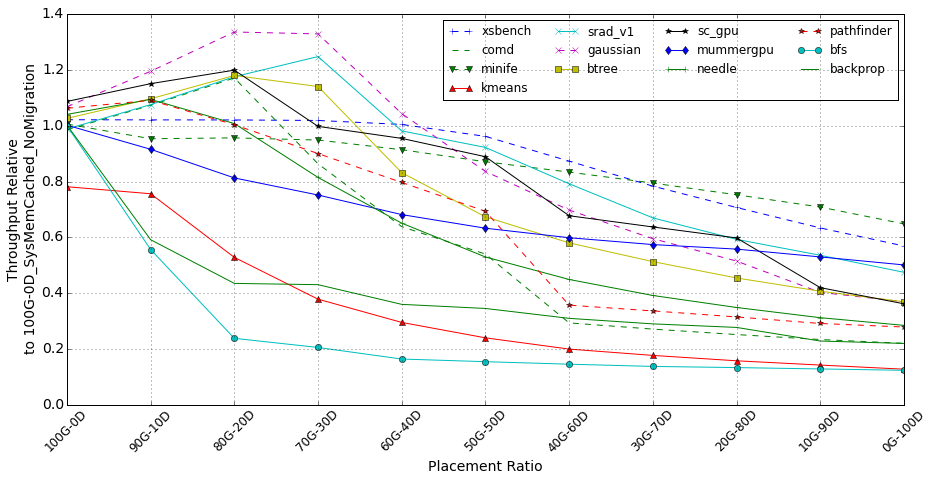

In [18]:
placement_nocaching = {}
with open ('placement-nocache') as fp:
    for line in fp:
        fields = line.strip().split(',')
        placement_nocaching[fields[0]] = []
        for i in range(len(fields) - 1):
            placement_nocaching[fields[0]].append(float(fields[i+1]))


bw_aware = {'xsbench':5.071,
            'comd':24.7331,
            'minife':27.2075,
            'kmeans':460.5104,
            'srad_v1':253.3181,
            'gaussian':140.4332,
            'btree':417.3465,
            'sc_gpu':44.4357,
            'mummergpu':40.4551,
            'needle':62.7147,
            'pathfinder':765.2994,
            'bfs':45.0347,
            'backprop':428.7127}

gpu_local = {'xsbench':2.9621,
             'comd':24.4544,
             'minife':20.3793,
             'kmeans':388.3735,
             'srad_v1':197.8303,
             'gaussian':129.46,
             'btree':410.0756,
             'sc_gpu':40.0738,
             'mummergpu':32.7385,
             'needle':58.7855,
             'pathfinder':743.9219,
             'bfs':31.7771,
             'backprop':341.1845}

placement_nocache_rel = {bm: [xi/gpu_local[bm] for xi in placement_nocaching[bm]] for bm in placement_nocaching}

bwaware_nocache_rel = {bm: placement_nocaching[bm][3]/gpu_local[bm] for bm in placement_nocaching}

bestPlacement_nocache_rel = {bm: max(placement_nocaching[bm])/gpu_local[bm] for bm in placement_nocaching}

bwaware_cache_rel = {bm: bw_aware[bm]/gpu_local[bm] for bm in bw_aware}

xlabels = []
for i in range(0, 110, 10):
    s = '%dG-%dD' % (100-i, i)
    xlabels.append(s)
labels = ['xsbench', 'comd', 'minife', 'kmeans', 'srad_v1', 'gaussian', 'btree', 'sc_gpu', 'mummergpu', 'needle', 'pathfinder', 'bfs', 'backprop']
markers = {'xsbench':'g--',
           'comd':'g-',
           'minife':'+-',
           'kmeans':'x-',
           'srad_v1':'*-',
           'gaussian':'^-',
           'btree':'o-',
           'sc_gpu':'d-',
           'mummergpu':'s-',
           'needle':'v--',
           'pathfinder':'+--',
           'bfs':'x--',
           'backprop':'*--'
          }
           #'^--', 'o--', 'd--', 's--', 'v--']
plt.figure(figsize=(15,7))
for bm in placement_nocache_rel:
    plt.plot(placement_nocache_rel[bm], markers[bm])
plt.xticks(range(11))
plt.gca().set_xticklabels(xlabels, rotation=45, size=12)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.legend(labels, ncol=4, loc='upper right')
plt.xlabel('Placement Ratio', size=14)
plt.ylabel('Throughput Relative \nto 100G-0D_SysMemCached_NoMigration', size=14)
plt.grid(True)
plt.savefig('placement-baseline.pdf')

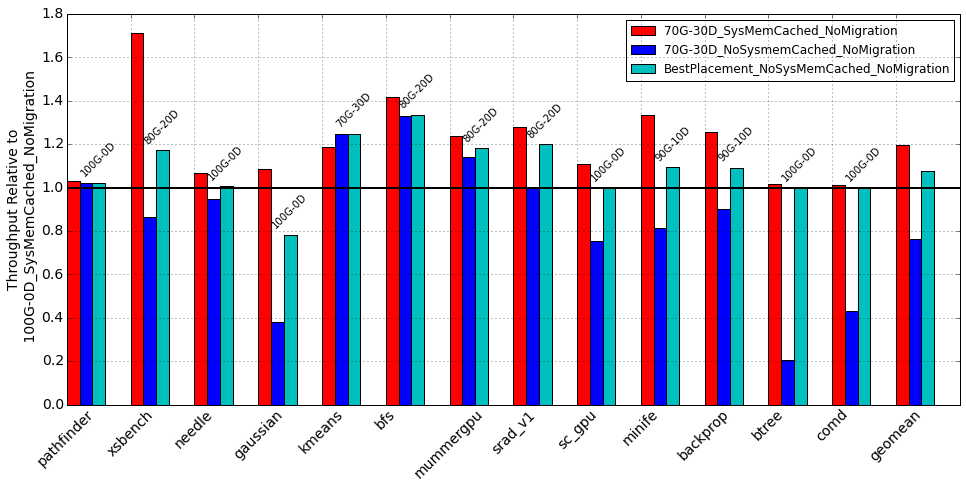

In [24]:
max_index = {}
best_ratio_label = {}
for mi,xi in placement_nocache_rel.items():
    bestPlacement_nocache_rel[mi] = max(xi)
    max_index[mi] = xi.index(max(xi))

for mi,xi in max_index.items():
    best_ratio_label[mi] = '%dG-%dD' % (100-xi*10, xi*10)

geo_bestPlacement_nocache_rel = scipy.stats.gmean(bestPlacement_nocache_rel.values())
geo_bwaware_nocache_rel = scipy.stats.gmean(bwaware_nocache_rel.values())
geo_bwaware_cache_rel = scipy.stats.gmean(bwaware_cache_rel.values())

### End Graph
labels = ['70G-30D_SysMemCached_NoMigration', '70G-30D_NoSysmemCached_NoMigration', 'BestPlacement_NoSysMemCached_NoMigration']
xlabels = []

plt.figure(figsize=(16,7))
width = 0.4
ind = np.arange(len(bwaware_nocache_rel) + 1)

for i,bm in zip(ind,bwaware_nocache_rel):
    plt.bar(i, bwaware_cache_rel[bm], width/2, label=bm, color='r')
    plt.bar(i+width/2, bwaware_nocache_rel[bm], width/2, color='b')
    plt.bar(i+2*width/2, bestPlacement_nocache_rel[bm], width/2, color='c')
    xlabels.append(bm)

i = len(bestPlacement_nocache_rel)
plt.bar(i, geo_bwaware_cache_rel, width/2, color='r')
plt.bar(i+width/2, geo_bwaware_nocache_rel, width/2, color='b')
plt.bar(i+2*width/2, geo_bestPlacement_nocache_rel, width/2, label='geomean',
        color='c')
xlabels.append('geomean')

plt.xticks(range(len(xlabels)))
plt.gca().set_xticklabels(xlabels, rotation=45, size=14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.legend(labels)
plt.ylabel('Throughput Relative to \n 100G-0D_SysMemCached_NoMigration', size=14)

# put the text outside the z bars
for i,(bm,bi) in zip(ind,bestPlacement_nocache_rel.items()):
    plt.text(i+2*width/2+width/4, bi+0.02, best_ratio_label[bm], ha='center', va='bottom', rotation=45)
plt.plot([0, len(bestPlacement_nocache_rel)+1], [1,1], 'k-', lw='2')
plt.grid(True)

plt.savefig('placement-bar.pdf')

In [1]:
x = [1,2,3]

In [2]:
print x

[1, 2, 3]
